In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from imutils import paths
import os
import time
import random
import pickle
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
warnings.filterwarnings("ignore")

In [15]:
list(paths.list_images('PetImages'))[0].split(sep='\\')[1]

'Cat'

In [17]:
data=[]
labels=[]
clases=['Cat','Dog',]

In [19]:
image_paths= sorted(list(paths.list_images('PetImages')))
image_paths

['PetImages\\Cat\\0.jpg',
 'PetImages\\Cat\\1.jpg',
 'PetImages\\Cat\\10.jpg',
 'PetImages\\Cat\\100.jpg',
 'PetImages\\Cat\\1000.jpg',
 'PetImages\\Cat\\10000.jpg',
 'PetImages\\Cat\\10001.jpg',
 'PetImages\\Cat\\10002.jpg',
 'PetImages\\Cat\\10003.jpg',
 'PetImages\\Cat\\10004.jpg',
 'PetImages\\Cat\\10005.jpg',
 'PetImages\\Cat\\10006.jpg',
 'PetImages\\Cat\\10007.jpg',
 'PetImages\\Cat\\10008.jpg',
 'PetImages\\Cat\\10009.jpg',
 'PetImages\\Cat\\1001.jpg',
 'PetImages\\Cat\\10010.jpg',
 'PetImages\\Cat\\10011.jpg',
 'PetImages\\Cat\\10012.jpg',
 'PetImages\\Cat\\10013.jpg',
 'PetImages\\Cat\\10014.jpg',
 'PetImages\\Cat\\10015.jpg',
 'PetImages\\Cat\\10016.jpg',
 'PetImages\\Cat\\10017.jpg',
 'PetImages\\Cat\\10018.jpg',
 'PetImages\\Cat\\10019.jpg',
 'PetImages\\Cat\\1002.jpg',
 'PetImages\\Cat\\10020.jpg',
 'PetImages\\Cat\\10021.jpg',
 'PetImages\\Cat\\10022.jpg',
 'PetImages\\Cat\\10023.jpg',
 'PetImages\\Cat\\10024.jpg',
 'PetImages\\Cat\\10025.jpg',
 'PetImages\\Cat\\10026.jp

In [21]:
random.seed(0)
random.shuffle(image_paths)

with tqdm(total=len(image_paths)) as pbar:
  for image_path in image_paths:
    imae= cv2.imread(image_path)
    image= cv2.resize(imae,(120,120)).flatten()
    data.append(image)
    label= image_path.split(os.path.sep)[-2]
    if label=='Cat':
      label=0
    elif label=='Dog':
      label=1
    else:
      label=2
    labels.append(label)
    pbar.update(1)

  0%|          | 0/25000 [00:00<?, ?it/s]

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [23]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,


In [25]:
data

[array([45, 43, 55, ..., 13, 12, 28], dtype=uint8),
 array([ 56, 148,  74, ...,  80, 145, 100], dtype=uint8),
 array([ 78, 122, 115, ...,  18,  89,  49], dtype=uint8),
 array([ 56,  43,  50, ...,  94, 121, 135], dtype=uint8),
 array([ 2,  7,  2, ..., 12, 12, 12], dtype=uint8),
 array([ 61,  92,  97, ..., 197, 189, 160], dtype=uint8),
 array([ 96, 134, 168, ...,  14,  23,  13], dtype=uint8),
 array([161, 185, 192, ...,  36,  62,  86], dtype=uint8),
 array([141, 148, 163, ...,  35,  19,  37], dtype=uint8),
 array([254, 254, 254, ..., 194, 237, 254], dtype=uint8),
 array([62, 60, 60, ..., 27, 29, 29], dtype=uint8),
 array([111, 104, 101, ...,  37,  40,  44], dtype=uint8),
 array([253, 254, 246, ..., 246, 254, 253], dtype=uint8),
 array([178, 180, 181, ...,  79,  85, 106], dtype=uint8),
 array([ 16,  20,  25, ..., 182, 199, 212], dtype=uint8),
 array([166, 189, 220, ..., 103, 113, 131], dtype=uint8),
 array([ 4, 27, 42, ..., 53, 67, 79], dtype=uint8),
 array([188, 174, 177, ..., 154, 137, 

In [27]:
data=np.array(data,dtype='float')/255.0
labels=np.array(labels)

In [29]:
data

array([[0.17647059, 0.16862745, 0.21568627, ..., 0.05098039, 0.04705882,
        0.10980392],
       [0.21960784, 0.58039216, 0.29019608, ..., 0.31372549, 0.56862745,
        0.39215686],
       [0.30588235, 0.47843137, 0.45098039, ..., 0.07058824, 0.34901961,
        0.19215686],
       ...,
       [0.56078431, 0.58039216, 0.48627451, ..., 0.34509804, 0.36862745,
        0.36470588],
       [0.62745098, 0.60392157, 0.55294118, ..., 0.2745098 , 0.24705882,
        0.26666667],
       [0.00392157, 0.08627451, 0.05490196, ..., 0.09019608, 0.09019608,
        0.09019608]])

In [31]:
print(data[:10],labels[:10])

[[0.17647059 0.16862745 0.21568627 ... 0.05098039 0.04705882 0.10980392]
 [0.21960784 0.58039216 0.29019608 ... 0.31372549 0.56862745 0.39215686]
 [0.30588235 0.47843137 0.45098039 ... 0.07058824 0.34901961 0.19215686]
 ...
 [0.63137255 0.7254902  0.75294118 ... 0.14117647 0.24313725 0.3372549 ]
 [0.55294118 0.58039216 0.63921569 ... 0.1372549  0.0745098  0.14509804]
 [0.99607843 0.99607843 0.99607843 ... 0.76078431 0.92941176 0.99607843]] [1 1 1 1 1 1 0 0 1 0]


In [33]:
X= pd.DataFrame(data)
y= pd.DataFrame(labels)

In [35]:
X= X.values
y= y.values

In [37]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
X_train.shape

(1068, 43200)

In [41]:
y_train.shape

(1068, 1)

In [43]:
y_train= to_categorical(y_train, num_classes=2)
y_test= to_categorical(y_test, num_classes=2)

In [45]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

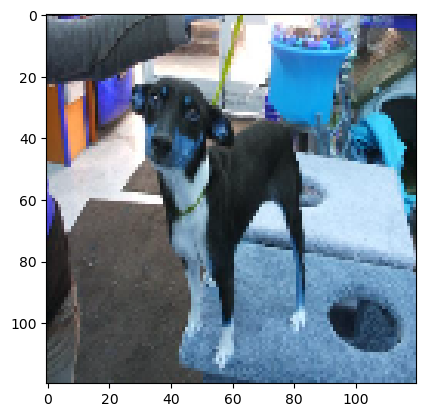

In [47]:
sample_image=(X_train[0]*255).astype('int')
plt.imshow(sample_image.reshape(120,120,3))